In [4]:
from configparser import ConfigParser, ExtendedInterpolation

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from spikelib.utils import check_directory
from sorting import get_features, plot_raster

%matplotlib notebook

config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')

['../../config.ini']

# Data acquisition

In [5]:
exp_name = config['EXP']['name']
sorting_file = config['FILES']['sorting']
sync_file = config['SYNC']['events']
fig_path = config['REPORT']['sorting']

check_directory(fig_path)

In [6]:
sync = pd.read_csv(sync_file)
filter_rep = sync['repetition_name'] == 'rep_000'
start_ponit = sync.loc[filter_rep, 'start_event'].values

isi_bin = 2
bins = np.linspace(0, isi_bin*100, 101)

In [7]:
with h5py.File(sorting_file, 'r') as f:
    features, isi = get_features(f)
    print(features.shape)

(350, 2)


# Figures
## Histogram ISI and firingrate

In [8]:
fig, ax = plt.subplots(2)
ax[0].hist(features[:, 0], bins=100)
ax[1].hist(features[:, 1], bins=100)
ax[0].set(title='Firingrate', xlabel='firing rate [spk/s]', ylabel='frequency')
ax[1].set(title='ISI', xlabel='bins [samples]', ylabel='frequency')
fig.tight_layout()
fig.savefig('{}histogram_{}.png'.format(fig_path, exp_name))

<IPython.core.display.Javascript object>

## Clustermap of ISI

In [9]:
isi_max = isi.max(axis=1, )
isi_max[isi_max==0] = 1

g = sns.clustermap(isi/isi_max[:, None], col_cluster=False, figsize=(10, 10))
g.savefig('{}clustermap_{}.png'.format(fig_path, exp_name))

<IPython.core.display.Javascript object>

## Raster plot for a range of units

In [10]:
start_ponit

array([12091205, 48380173, 59235361, 59804172, 60371517, 60941107,
       61510470, 62092693, 64871950, 67651206, 70430468, 98482411])

<IPython.core.display.Javascript object>


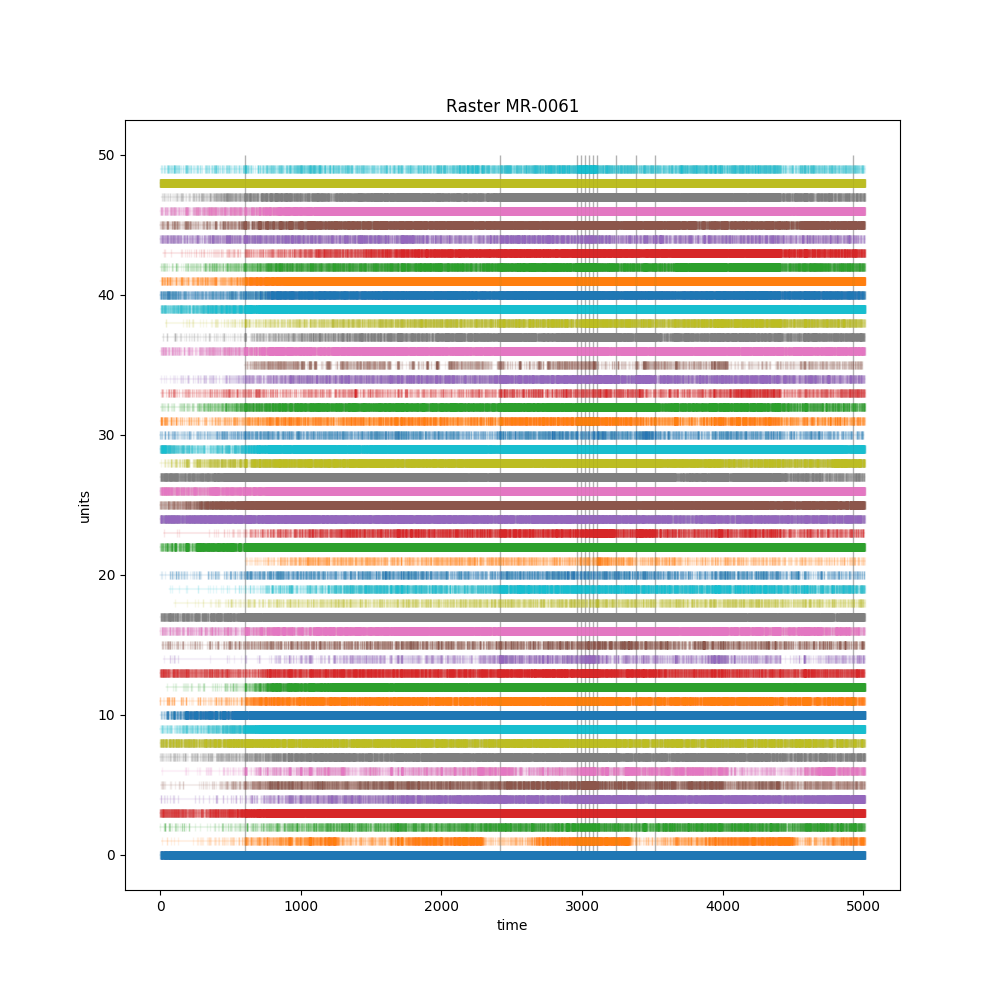

In [12]:
with h5py.File(sorting_file, 'r') as f:
#     fig, ax = plot_raster(sorting=f, idx_units=range(100,120), protocols_points=None)
#     fig, ax = plot_raster(sorting=f, range_view=(200, 250), protocols_points=None)
    fig, ax = plot_raster(
        sorting=f,
        range_view=(150, 200),
        protocols_points=start_ponit,
        figsize=(10, 10),
    )
    ax.set(title='Raster {}'.format(exp_name))
    fig.savefig('{}rasterplot_{}.png'.format(fig_path, exp_name))